In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [2]:
df = pd.read_csv('../../data/BTC-USD.csv')
df1=df.reset_index()['Close']

In [3]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

## 6-2-2

In [4]:
train_size = int(0.6 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size + test_size]
val_data = df1[train_size + test_size:]

In [5]:
import numpy
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [6]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [7]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)

In [8]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", ytest.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", yval.shape)

X_train shape: (1177, 100, 1)
y_train shape: (1177,)
X_test shape: (325, 100, 1)
y_test shape: (325,)
X_val shape: (326, 100, 1)
y_val shape: (326,)


In [9]:
model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [10]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
19/19 [==============================] - 1s 14ms/step - loss: 0.0164 - val_loss: 0.0066
Epoch 2/100
19/19 [==============================] - 0s 7ms/step - loss: 0.0020 - val_loss: 0.0032
Epoch 3/100
19/19 [==============================] - 0s 8ms/step - loss: 0.0010 - val_loss: 0.0026
Epoch 4/100
19/19 [==============================] - 0s 7ms/step - loss: 8.7113e-04 - val_loss: 0.0025
Epoch 5/100
19/19 [==============================] - 0s 7ms/step - loss: 7.8503e-04 - val_loss: 0.0019
Epoch 6/100
19/19 [==============================] - 0s 8ms/step - loss: 7.6596e-04 - val_loss: 0.0021
Epoch 7/100
19/19 [==============================] - 0s 8ms/step - loss: 6.5975e-04 - val_loss: 0.0016
Epoch 8/100
19/19 [==============================] - 0s 7ms/step - loss: 6.0001e-04 - val_loss: 0.0016
Epoch 9/100
19/19 [==============================] - 0s 7ms/step - loss: 5.6968e-04 - val_loss: 0.0013
Epoch 10/100
19/19 [==============================] - 0s 8ms/step - loss: 5.2980e-04

Epoch 78/100
19/19 [==============================] - 0s 7ms/step - loss: 2.0213e-04 - val_loss: 8.3977e-04
Epoch 79/100
19/19 [==============================] - 0s 7ms/step - loss: 2.1809e-04 - val_loss: 0.0013
Epoch 80/100
19/19 [==============================] - 0s 7ms/step - loss: 2.1226e-04 - val_loss: 5.4826e-04
Epoch 81/100
19/19 [==============================] - 0s 7ms/step - loss: 2.0013e-04 - val_loss: 7.2209e-04
Epoch 82/100
19/19 [==============================] - 0s 7ms/step - loss: 2.0635e-04 - val_loss: 6.6297e-04
Epoch 83/100
19/19 [==============================] - 0s 7ms/step - loss: 2.4221e-04 - val_loss: 6.8294e-04
Epoch 84/100
19/19 [==============================] - 0s 8ms/step - loss: 2.0099e-04 - val_loss: 5.5479e-04
Epoch 85/100
19/19 [==============================] - 0s 8ms/step - loss: 2.0275e-04 - val_loss: 5.4297e-04
Epoch 86/100
19/19 [==============================] - 0s 8ms/step - loss: 1.9423e-04 - val_loss: 6.2006e-04
Epoch 87/100
19/19 [============

In [11]:
train_predict = model.predict(X_train)
y_pred = model.predict(X_test)
y_pred_val = model.predict(X_val)

11/11 [==============================] - 0s 2ms/step


In [12]:
train_predict = scaler.inverse_transform(train_predict)
y_pred = scaler.inverse_transform(y_pred)
y_pred_val = scaler.inverse_transform(y_pred_val)

In [13]:
ytest = scaler.inverse_transform(ytest.reshape(-1,1))
yval = scaler.inverse_transform(yval.reshape(-1,1))

In [14]:
print('---------VALIDATE----------')
valid_mape = np.mean(np.abs( (yval - y_pred_val) / yval )) * 100
print('MAPE:', valid_mape)
valid_mae = np.mean(np.abs(y_pred_val - yval))
print('MAE:', valid_mae)
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
print('RMSE:', valid_rmse)
print('---------TEST-------------')
test_mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
print('MAPE:', test_mape)
test_mae = np.mean(np.abs(y_pred - ytest))
print('MAE:', test_mae)
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('RMSE:', test_rmse)

---------VALIDATE----------
MAPE: 1.7449617184046324
MAE: 448.2652954846625
RMSE: 637.184919197105
---------TEST-------------
MAPE: 2.785440117315857
MAE: 1060.3906730676922
RMSE: 1465.4417900922685
-------------------------


In [15]:
val_data.shape

(427, 1)

In [16]:
x_input=val_data[326:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.40401993 0.40600317 0.40376031 0.40544781 0.40603341 0.40476481
 0.40406222 0.41098933 0.40284736 0.40326273 0.40163693 0.40114004
 0.40113582 0.40329224 0.41238463 0.40921351 0.40716311 0.40666759
 0.40695128 0.40488303 0.40683436 0.40313321 0.39584939 0.36418102
 0.35462104 0.35534618 0.35679774 0.35578043 0.35434278 0.36056047
 0.35637475 0.35459168 0.35398224 0.35524496 0.35550078 0.38070271
 0.37401646 0.35278544 0.35075299 0.35181119 0.3533776  0.35093473
 0.35043055 0.35001479 0.35758448 0.3523841  0.35222902 0.35124268
 0.34083429 0.35126005 0.35739995 0.36223983 0.36331272 0.36268452
 0.36215454 0.36557586 0.3726773  0.37144756 0.36267444 0.36285998
 0.36285722 0.35784301 0.35849052 0.3572278  0.35933361 0.36973046
 0.36802323 0.36889678 0.38468775 0.37764648 0.37607946 0.38182197
 0.3758608  0.38411022 0.38445597 0.38393133 0.37846869 0.37547385
 0.3674263  0.365615   0.36725616 0.36724578 0.37187729 0.39301537
 0.39140308 0.39004437 0.39612962 0.41110151 0.414

7 day output [[0.5238731]]
8 day input [0.40284736 0.40326273 0.40163693 0.40114004 0.40113582 0.40329224
 0.41238463 0.40921351 0.40716311 0.40666759 0.40695128 0.40488303
 0.40683436 0.40313321 0.39584939 0.36418102 0.35462104 0.35534618
 0.35679774 0.35578043 0.35434278 0.36056047 0.35637475 0.35459168
 0.35398224 0.35524496 0.35550078 0.38070271 0.37401646 0.35278544
 0.35075299 0.35181119 0.3533776  0.35093473 0.35043055 0.35001479
 0.35758448 0.3523841  0.35222902 0.35124268 0.34083429 0.35126005
 0.35739995 0.36223983 0.36331272 0.36268452 0.36215454 0.36557586
 0.3726773  0.37144756 0.36267444 0.36285998 0.36285722 0.35784301
 0.35849052 0.3572278  0.35933361 0.36973046 0.36802323 0.36889678
 0.38468775 0.37764648 0.37607946 0.38182197 0.3758608  0.38411022
 0.38445597 0.38393133 0.37846869 0.37547385 0.3674263  0.365615
 0.36725616 0.36724578 0.37187729 0.39301537 0.39140308 0.39004437
 0.39612962 0.41110151 0.41476174 0.41593513 0.464005   0.47667859
 0.48602559 0.48064441 0.

17 day output [[0.54582417]]
18 day input [0.40695128 0.40488303 0.40683436 0.40313321 0.39584939 0.36418102
 0.35462104 0.35534618 0.35679774 0.35578043 0.35434278 0.36056047
 0.35637475 0.35459168 0.35398224 0.35524496 0.35550078 0.38070271
 0.37401646 0.35278544 0.35075299 0.35181119 0.3533776  0.35093473
 0.35043055 0.35001479 0.35758448 0.3523841  0.35222902 0.35124268
 0.34083429 0.35126005 0.35739995 0.36223983 0.36331272 0.36268452
 0.36215454 0.36557586 0.3726773  0.37144756 0.36267444 0.36285998
 0.36285722 0.35784301 0.35849052 0.3572278  0.35933361 0.36973046
 0.36802323 0.36889678 0.38468775 0.37764648 0.37607946 0.38182197
 0.3758608  0.38411022 0.38445597 0.38393133 0.37846869 0.37547385
 0.3674263  0.365615   0.36725616 0.36724578 0.37187729 0.39301537
 0.39140308 0.39004437 0.39612962 0.41110151 0.41476174 0.41593513
 0.464005   0.47667859 0.48602559 0.48064441 0.4768072  0.47960175
 0.48657992 0.48601849 0.48858988 0.5005512  0.50660491 0.51793575
 0.51777023 0.518458

25 day output [[0.56159383]]
26 day input [0.35679774 0.35578043 0.35434278 0.36056047 0.35637475 0.35459168
 0.35398224 0.35524496 0.35550078 0.38070271 0.37401646 0.35278544
 0.35075299 0.35181119 0.3533776  0.35093473 0.35043055 0.35001479
 0.35758448 0.3523841  0.35222902 0.35124268 0.34083429 0.35126005
 0.35739995 0.36223983 0.36331272 0.36268452 0.36215454 0.36557586
 0.3726773  0.37144756 0.36267444 0.36285998 0.36285722 0.35784301
 0.35849052 0.3572278  0.35933361 0.36973046 0.36802323 0.36889678
 0.38468775 0.37764648 0.37607946 0.38182197 0.3758608  0.38411022
 0.38445597 0.38393133 0.37846869 0.37547385 0.3674263  0.365615
 0.36725616 0.36724578 0.37187729 0.39301537 0.39140308 0.39004437
 0.39612962 0.41110151 0.41476174 0.41593513 0.464005   0.47667859
 0.48602559 0.48064441 0.4768072  0.47960175 0.48657992 0.48601849
 0.48858988 0.5005512  0.50660491 0.51793575 0.51777023 0.51845872
 0.51548958 0.5190506  0.52022749 0.52387309 0.52699035 0.52766311
 0.53330773 0.53479213

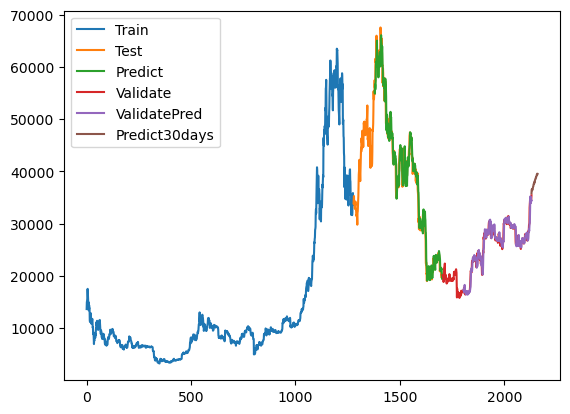

In [17]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))

val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))

plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()